In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Random Forest Regression

In [2]:
games = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


In [3]:
table = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['original', 'oversampled', 'balanced_sampled'])

In [4]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 600,  # n_estimators denote number of trees
                                 max_depth = 11)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=600)

Train Data
Accuracy  :	 0.7307597737890337

TPR Train :	 0.9797463562369866
TNR Train :	 0.2693791652051912

FPR Train :	 0.7306208347948089
FNR Train :	 0.02025364376301344

Precision:	 0.8777142857142857
Recall:   	 0.2693791652051912
F1-score :	 0.41223832528180354


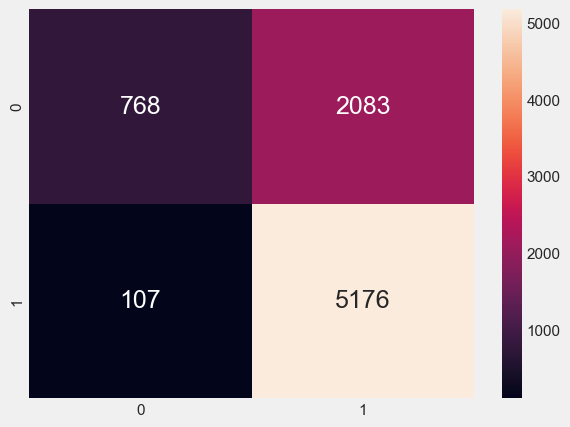

In [5]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.6597819850831899

TPR Test :	 0.9285399205999118
TNR Test :	 0.15996718621821165

FPR Test :	 0.8400328137817884
FNR Test :	 0.07146007940008822

Precision:	 0.5462184873949579
Recall:   	 0.15996718621821165
F1-score :	 0.24746192893401017


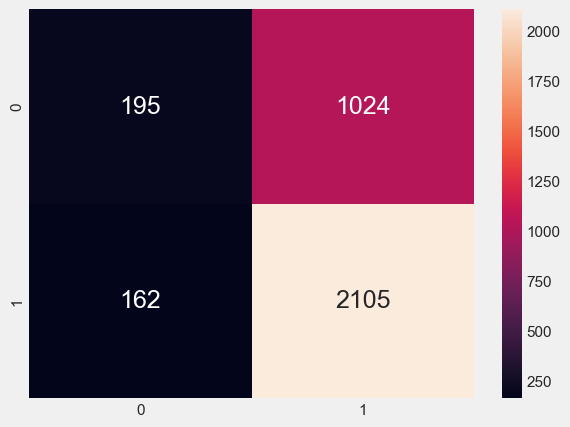

In [6]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['original'] = [recall[0], precision[0], rforest.score(X_test, y_test), fscore[0]]


# Random Forest Regression - Oversampling

In [7]:
games = pd.read_csv('datasets/games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


In [8]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.7578051087984863

TPR Train :	 0.8774315391879132
TNR Train :	 0.6076339497392129

FPR Train :	 0.3923660502607871
FNR Train :	 0.12256846081208687

Precision:	 0.797945205479452
Recall:   	 0.6076339497392129
F1-score :	 0.6899057873485869


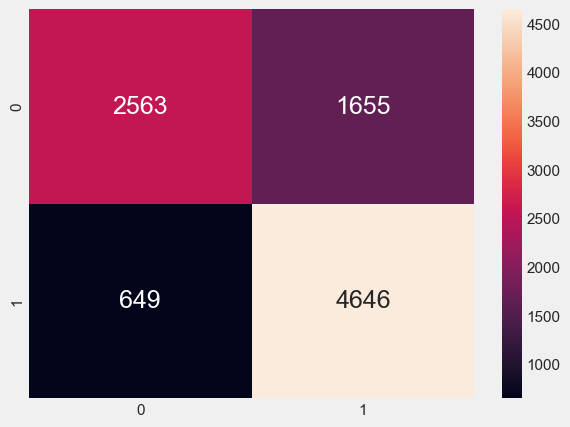

In [9]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6311012999754722

TPR Test :	 0.7596452328159645
TNR Test :	 0.47200878155872666

FPR Test :	 0.5279912184412733
FNR Test :	 0.24035476718403548

Precision:	 0.6134094151212554
Recall:   	 0.47200878155872666
F1-score :	 0.533498759305211


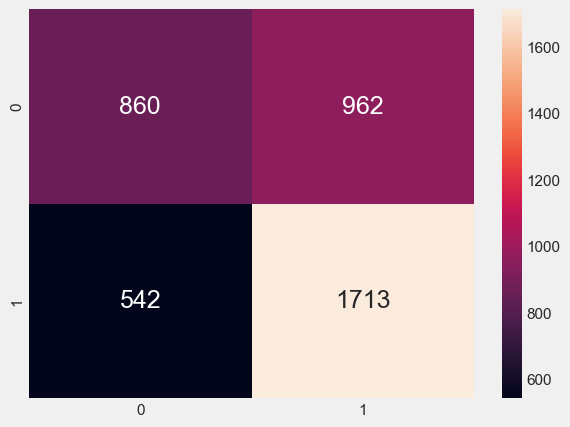

In [10]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['oversampled'] = [recall[0], precision[0], rforest.score(X_test, y_test), fscore[0]]


# Random Forest Regression - Balanced Resampling

In [11]:
games = pd.read_csv('datasets/games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [12]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.7555345316934721

TPR Train :	 0.7797765574701762
TNR Train :	 0.7313291737568538

FPR Train :	 0.26867082624314614
FNR Train :	 0.2202234425298239

Precision:	 0.768833233949513
Recall:   	 0.7313291737568538
F1-score :	 0.7496124031007751


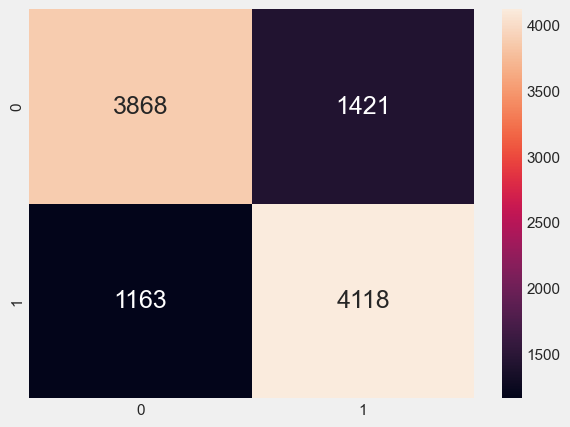

In [13]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['balanced_sampled'] = [recall[0], precision[0], rforest.score(X_test, y_test), fscore[0]]


Test Data
Accuracy  :	 0.6604856512141281

TPR Test :	 0.6734244160423094
TNR Test :	 0.6475011057054401

FPR Test :	 0.35249889429455994
FNR Test :	 0.3265755839576906

Precision:	 0.6639455782312925
Recall:   	 0.6475011057054401
F1-score :	 0.6556202418271383


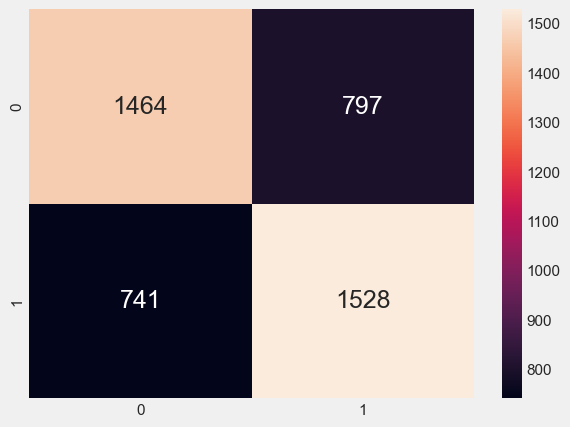

In [14]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

## Cross Validation - tuning hyperparameters of Random Forest

In [16]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

games = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games.head()

# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,3001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 25)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'recall')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train)

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)
# Generate predictions for the test data
y_test_pred = hpGrid.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

In [ ]:
table_cv = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['balanced_sampled'])
table_cv['balanced_sampled'] = [ recall[0], precision[0], rforest.score(X_test, y_test), fscore[0] ]




### Overview Visualization of Results

In [ ]:
table

In [ ]:
def draw_figure(table, row, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.ylim([0,0.9])
    splot = sb.barplot(x = ['original','oversampled','balanced_sampled'],y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')

In [ ]:
draw_figure(table,0,"Recall Across 3 Sampling Data")

In [ ]:
draw_figure(table,1,"Recall Across 3 Sampling Data")

In [ ]:
draw_figure(table,2,"Recall Across 3 Sampling Data")

In [ ]:
draw_figure(table,3,"Recall Across 3 Sampling Data")

In [ ]:
table_cv